## Урок 5. Домашнее задание

In [1]:
import numpy as np
import itertools
from matplotlib import pyplot as plt

%matplotlib inline

__Задание 1.__ Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

__Решение:__

In [2]:
# 37 - количество полей в рулетке 36 чисел + зеро
def spin():
    return np.random.randint(0, 37)

spin()

11

__Задание 2.__
1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки. <br>
2) Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы  х0+ …+ х 9. 

__Решение:__ <br>
1) Рассмотрим утверждение, что если $A, B, ... $ - полная группа несовместных событий, то $P(A) + P(B) + ... = 1$. Очевидно, что во время игры в рулетку может выпасть только одно поле, то есть события являются несовместными. Каждое поле представляет собой таким образом одно из множества несовместных событий. Проведем эксперименты, затем оценим вероятность выпадения каждого поля, и сумму всех вероятностей.

In [3]:
# 37 - количество полей в рулетке 36 чисел + зеро
events = [0] * 37
# количество экспериментов
experiments = 1000000
for i in range(experiments):
    events[spin()] += 1
        
for i in range(0, len(events)):
    print(f'Вероятность выпадения значения {i} - {events[i]/experiments:.6f}.')

print(f'Суммарная вероятность всех событий равна = {np.sum(events)/experiments:.6f}.')

Вероятность выпадения значения 0 - 0.026867.
Вероятность выпадения значения 1 - 0.027065.
Вероятность выпадения значения 2 - 0.027071.
Вероятность выпадения значения 3 - 0.026959.
Вероятность выпадения значения 4 - 0.026694.
Вероятность выпадения значения 5 - 0.026844.
Вероятность выпадения значения 6 - 0.026852.
Вероятность выпадения значения 7 - 0.027165.
Вероятность выпадения значения 8 - 0.027307.
Вероятность выпадения значения 9 - 0.027107.
Вероятность выпадения значения 10 - 0.027048.
Вероятность выпадения значения 11 - 0.027103.
Вероятность выпадения значения 12 - 0.027105.
Вероятность выпадения значения 13 - 0.026877.
Вероятность выпадения значения 14 - 0.027047.
Вероятность выпадения значения 15 - 0.026873.
Вероятность выпадения значения 16 - 0.026990.
Вероятность выпадения значения 17 - 0.027037.
Вероятность выпадения значения 18 - 0.027183.
Вероятность выпадения значения 19 - 0.027092.
Вероятность выпадения значения 20 - 0.027248.
Вероятность выпадения значения 21 - 0.027155

Вообще говоря каждое поле рулетки имеет одинаковую вероятность выпадения - $\frac{1}{37} \approx 0.027027$. Как видим, полученные в ходе нашего эксперимента вероятности очень близки к этому значению. А самое главное мы подтвердили одну из теорем сложения вероятности, что сумма вероятностей всех несовместных событий равна единице.

2) Сгенерируем 10 случайных выборок, каждая из которых состоит из 10000 чисел. То есть каждая выборка будет своего рода вектор с 10000 координат. Затем сложим эти векторы покоординатно и построим гистограмму.

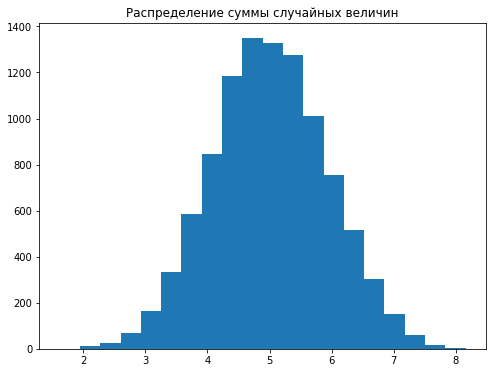

In [4]:
n = 10
k = 10000
X = []
Y = [0] * k
for i in range(n):
    vector = np.random.rand(k)
    X.append(vector)
    Y += vector

plt.figure(figsize=(8, 6))
plt.title('Распределение суммы случайных величин')
plt.hist(Y, 20)
plt.show()

Видим, что получившаяся гистограмма напоминает график функции плотности нормального распределения. Это ожидаемый результат, который является иллюстрацией центральной предельной теоремы.

__Задание 3.__ <br>
1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты. <br>
2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

__Решение:__ <br>
1) Сначала приведем код, представленный на лекции.

In [5]:
k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)

3692 10000 0.3692


Вероятность того, что некое событие $A$ наступит ровно $k$ раз, согласно формуле Бернулли может быть вычислена следующим образом: $P_{n}^{k} = C_{n}^{k}\cdot p^{k}\cdot q^{n-k}$. Значит по данной формуле вероятность того, что в четырех испытаниях ровно 2 раза выпадет орел (это одновременно означает, что ровно 2 раза выпадет решка) составляет:
### $$P_{n}^{k} = \frac{4!}{2!2!}\cdot0.5^2\cdot0.5^2 = 6 \cdot 0.5^4 = \frac{6}{16} = 0.375$$
Как видим вероятность, рассчитанная с помощью кода, получилась очень близкой к значению, полученному по формуле.

2) Перепишем код, отвечающий за реализацию Монте-Карло, в виде функции. Также реализуем в виде кода рассчет формулы Бернулли. В качестве испытаний будем продолжать рассматривать подбрасывание монетки ($p = q = 0.5$).

In [6]:
### условимся, что событие 0 - это орел, а 1 - решка
### строим функцию вокруг заданного количества выпадения решек

def monte_carlo(k, n):
    obs, m = 0, 100000
    total = [0] * m
    
    for i in range(n):
        total += np.random.randint(0, 2, m)
    
    for j in range(m):
        if total[j] == k:
            obs += 1
    
    return obs/m

In [7]:
print(f'Вероятность, что в 4 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью Монте-Карло - '
      f'{monte_carlo(2, 4):.4f}.')
print(f'Вероятность, что в 4 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью Монте-Карло - '
      f'{monte_carlo(3, 4):.4f}.')
print(f'Вероятность, что в 5 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью Монте-Карло - '
      f'{monte_carlo(2, 5):.4f}.')
print(f'Вероятность, что в 7 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью Монте-Карло - '
      f'{monte_carlo(3, 7):.4f}.')

Вероятность, что в 4 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью Монте-Карло - 0.3774.
Вероятность, что в 4 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью Монте-Карло - 0.2517.
Вероятность, что в 5 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью Монте-Карло - 0.3134.
Вероятность, что в 7 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью Монте-Карло - 0.2728.


In [8]:
### Теперь реализуем рассчет по формуле Бернулли
def bernoulli(k, n, p=0.5):
    coeff = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))
    return coeff * (p**k) * ((1-p)**(n-k))

In [9]:
print(f'Вероятность, что в 4 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью формулы Бернулли - '
      f'{bernoulli(2, 4):.4f}.')
print(f'Вероятность, что в 4 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью формулы Бернулли - '
      f'{bernoulli(3, 4):.4f}.')
print(f'Вероятность, что в 5 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью формулы Бернулли - '
      f'{bernoulli(2, 5):.4f}.')
print(f'Вероятность, что в 7 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью формулы Бернулли - '
      f'{bernoulli(3, 7):.4f}.')

Вероятность, что в 4 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью формулы Бернулли - 0.3750.
Вероятность, что в 4 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью формулы Бернулли - 0.2500.
Вероятность, что в 5 испытаниях ровно 2 раза выпадет решка, рассчитанная с помощью формулы Бернулли - 0.3125.
Вероятность, что в 7 испытаниях ровно 3 раза выпадет решка, рассчитанная с помощью формулы Бернулли - 0.2734.


Как видим вероятности, рассчитанные разными методами, очень близки.

__Задание 4.__ (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

__Решение:__ <br>
Перестановками называются такие размещения, для которых $n = k$. Тогда число перестановок считается по формуле $n!$. Реализуем на Питоне.

In [10]:
n = 5

s = ''
l = 0
for i in range(n):
    s += str(i)
    
for p in itertools.permutations(s, n):
    print(''.join(str(x) for x in p))
    l += 1

print(f'Общее число перестановок для заданной длины {n} - {l}.')

01234
01243
01324
01342
01423
01432
02134
02143
02314
02341
02413
02431
03124
03142
03214
03241
03412
03421
04123
04132
04213
04231
04312
04321
10234
10243
10324
10342
10423
10432
12034
12043
12304
12340
12403
12430
13024
13042
13204
13240
13402
13420
14023
14032
14203
14230
14302
14320
20134
20143
20314
20341
20413
20431
21034
21043
21304
21340
21403
21430
23014
23041
23104
23140
23401
23410
24013
24031
24103
24130
24301
24310
30124
30142
30214
30241
30412
30421
31024
31042
31204
31240
31402
31420
32014
32041
32104
32140
32401
32410
34012
34021
34102
34120
34201
34210
40123
40132
40213
40231
40312
40321
41023
41032
41203
41230
41302
41320
42013
42031
42103
42130
42301
42310
43012
43021
43102
43120
43201
43210
Общее число перестановок для заданной длины 5 - 120.


In [11]:
np.math.factorial(n)

120

Как видим, значение, рассчитанное по формуле, совпадает с общим количеством перестановок, посчитанных с помощью модуля `itertools`.

__Задание 5.__ (не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле
### $$R = \frac{\sum{(x_{i} - x_{m})(y_{i} - y_{m})}}{\sqrt{\sum{(x_{i} - x_{m})^2 \sum{(y_{i} - y_{m})^2}}}}$$

__Решение:__ <br>
Воспользуемся кодом, представленным на занятии, добавив расчет коэффициента корреляции.

Коэффициенты, рассчитанные вручную - (0.6371855051355841, 0.19110062195564395)
Коэффициенты, рассчитанные с помощью библиотеки Numpy - (0.6371855051355837, 0.19110062195564398)
Коэффициент корреляции, рассчитанный вручную - 0.892614
Коэффициент корреляции, рассчитанный с помощью библиотеки Numpy - 0.892614


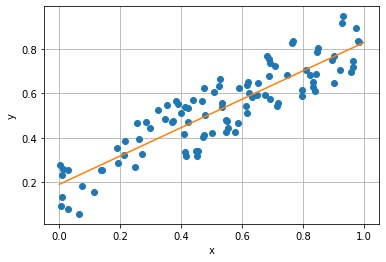

In [12]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
print(f'Коэффициенты, рассчитанные вручную - {a, b}')
print(f'Коэффициенты, рассчитанные с помощью библиотеки Numpy - {a1, b1}')

### Расчет коэффициента корреляции по формуле
cor_coeff = (np.sum(x * y) - np.sum(x) * np.sum(y) / n) / \
            np.sqrt((np.sum((x - np.sum(x)/n) ** 2) * (np.sum((y - np.sum(y)/n) ** 2))))

print(f'Коэффициент корреляции, рассчитанный вручную - {cor_coeff:.6f}')
print(f'Коэффициент корреляции, рассчитанный с помощью библиотеки Numpy - {np.corrcoef(x, y)[0, 1]:.6f}')


plt.plot([0, 1], [b, a + b])
plt.show()